## ML- Practical Homework 04
### Alireza Ansari
#### Stident ID: 400123114

***

### Question 04

First, We need to import necessary libraries:

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import time
from sklearn import svm
import numpy as np 
from sklearn.inspection import DecisionBoundaryDisplay

At the second step, we need to import the data and explore it 

In [5]:
df = pd.read_csv('mitbih.csv')
df.head()
# df.info()

,9.779411554336546741e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659335e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292723222e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***

### Part A.

At the following section, we try to split the data to Train, Validation and Test datasets(splitting training data into validation and training data).


In [6]:
X = df.drop(columns=df.columns[-1]) # Features
y = df[df.columns[-1]][:] # Classes

[X_train, X_test, y_train, y_test]=train_test_split(X,y,stratify=y,random_state=1,test_size=0.3) # 70% train and 30% test
# splitting training data into validation and training data
[X_train, X_val, y_train, y_val]=train_test_split(X_train,y_train,stratify=y_train,test_size=0.25) 
print(df.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(109445, 188)
(57458, 187)
(32834, 187)
(19153, 187)


At this point, we define the Linear Large Margin SVM Classifier. After that, by fitting the Train dataset, we report the accuracy of model

In [7]:
# Linear Large Margin SVM Classifier
linearSVMClassifier=svm.SVC(kernel="linear",C=1e-8,max_iter=2000,tol=0.01) 
linearSVMClassifier.fit(X_train,y_train) # Training
print(f'Linear large margin SVM classifier accuarcy for test data: {linearSVMClassifier.score(X_test,y_test)*100:.1f}%')
print(f'Linear large margin SVM classifier accuarcy for train data: {linearSVMClassifier.score(X_train,y_train)*100:.1f}%')

# finding support vectors
print(f'number of support vectors: {linearSVMClassifier.support_vectors_.shape[0]}')

C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Linear large margin SVM classifier accuarcy for test data: 73.7%
Linear large margin SVM classifier accuarcy for train data: 73.2%
number of support vectors: 12512


#### As we can see, the accuracy of Linear large margin SVM classifier is: 73.7%

#### and the accuracy of Linear large margin SVM classifier is: 73.2%

#### and the total number of support vectors are: 12512

***

### Part B.

In the following section, we will use linear SVM and Soft Margin. To find the best value of coefficient C, we use the results of the validation data accuracy chart for each coefficient. The mentioned diagram is obtained as follows:

C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\alire\AppData\Roaming\Python\Python39\site-

Best soft parameter: C=1.0


C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best linear soft margin SVM classifier accuarcy for test data: 86.5%
Best linear soft margin SVM classifier accuarcy for train data: 86.4%
number of support vectors: 7488


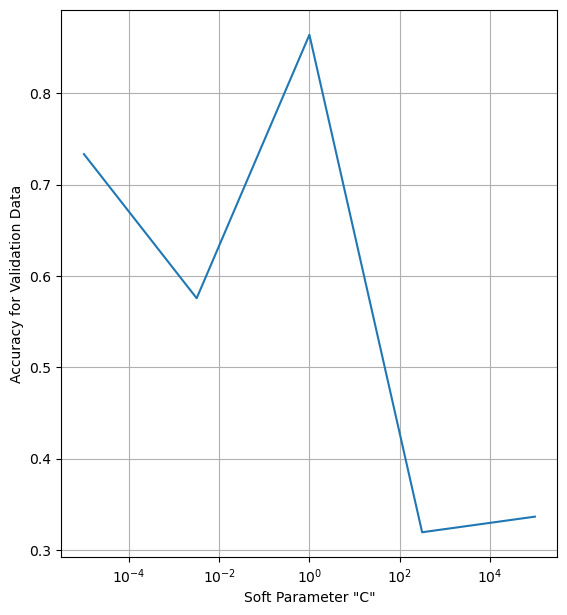

In [9]:
# Linear Soft Margin SVM Classifier
steps_num=5 # number of different soft parameters
steps=np.logspace(-5,5,num=steps_num) # soft parameters
val_score=[] # validation accuracies for different soft parameters

for i in range(steps_num):
  # defines linear SVM classifier with validation using 20% of the training data and without regularization
  linearSVMClassifier=svm.SVC(kernel="linear",C=steps[i],max_iter=2000,tol=0.01) 
  linearSVMClassifier.fit(X_train,y_train) # Training
  val_score.append(linearSVMClassifier.score(X_val,y_val)) # stores validation data score for the specified soft parameter

fig, axs = plt.subplots(1,1)
plt.subplots_adjust(top=1.25)
axs.plot(steps,val_score)
axs.set(xlabel='Soft Parameter \"C\"', ylabel='Accuracy for Validation Data')
axs.set_xscale('log')
axs.grid()

best_soft_param=steps[val_score.index(np.max(val_score))] # stores the best soft parameters based on the validation data scores
print(f'Best soft parameter: C={best_soft_param}')

linearSVMClassifier=svm.SVC(kernel="linear",C=best_soft_param,max_iter=2000,tol=0.01) 
linearSVMClassifier.fit(X_train,y_train) # Training

print(f'Best linear soft margin SVM classifier accuarcy for test data: {linearSVMClassifier.score(X_test,y_test)*100:.1f}%')
print(f'Best linear soft margin SVM classifier accuarcy for train data: {linearSVMClassifier.score(X_train,y_train)*100:.1f}%')
# finding support vectors
print(f'number of support vectors: {linearSVMClassifier.support_vectors_.shape[0]}')

### In this way, the best coefficient C equal to 1 is obtained. Also, the accuracy for test and training data as well as the number of support vectors will be as follows:

Best linear soft margin SVM classifier accuarcy for test data: 86.5%

Best linear soft margin SVM classifier accuarcy for train data: 86.4%

number of support vectors: 7488

### The use of Soft Margin greatly helps the separation accuracy. The reason for this can be considered the presence of noisy data. In addition, it is unlikely that the data can be separated linearly. Also, the number of support vectors is reduced when using Soft Margin. The reason for this is that the more we move from C=0 to infinity, the size of the margins decreases and thus less data is placed inside this border.

***

### Part C.

This time we use non-linear SVM. By examining two types of kernels, Polynomial (order 3) and RBF, the results of validation data for using these two types of kernels were obtained as follows:

In [10]:
# Nonlinear Large Margin SVM Classifier
C = 1e-8  # SVM regularization parameter
nonlinearSVMClassifiers = (
    svm.SVC(kernel="rbf", gamma=0.7, C=C,max_iter=2000,tol=0.01),
    svm.SVC(kernel="poly", degree=3, C=C,max_iter=2000,tol=0.01)
)
nonlinearSVMClassifiers = (clf.fit(X_train, y_train) for clf in nonlinearSVMClassifiers)

# title for the plots
titles = (
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)
models=list(nonlinearSVMClassifiers)
scores=[]
for i in range(2) :
  scores.append(models[i].score(X_val,y_val))
  print(f'{titles[i]} validation data accuracy is: {scores[i]*100:.1f}%' )

best_kernel_index=np.where(scores==np.max(scores))[0][0]
print(f'{titles[best_kernel_index]} is the best nonlinear classifier between RBF and Polynomial kernels')
print(f'\n{titles[best_kernel_index]} test data accuarcy is: {models[best_kernel_index].score(X_test,y_test)*100:.1f}%' )
print(f'{titles[best_kernel_index]} train data accuarcy is: {models[best_kernel_index].score(X_train,y_train)*100:.1f}%' )
# finding support vectors
print(f'number of support vectors: {models[best_kernel_index].support_vectors_.shape[0]}')

C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC with RBF kernel validation data accuracy is: 87.6%
SVC with polynomial (degree 3) kernel validation data accuracy is: 14.8%
SVC with RBF kernel is the best nonlinear classifier between RBF and Polynomial kernels

SVC with RBF kernel test data accuarcy is: 87.8%
SVC with RBF kernel train data accuarcy is: 88.8%
number of support vectors: 12357


### As we can see from the results above, the RBF kernel has a much better performance on this dataset. Also, the accuracy for test and training data as well as the number of support vectors for this kernel will be as follows:

SVC with RBF kernel test data accuarcy is: 87.8%

SVC with RBF kernel train data accuarcy is: 88.8%

number of support vectors: 12357

***

### Part D.

In this part, we also use Soft Margin in the non-linear SVM with RBF kernel from the previous part. To find the best coefficient C, we used the results of the validation data accuracy chart for each coefficient. The mentioned diagram is obtained as follows:

C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\alire\AppData\Roaming\Python\Python39\site-

Best soft parameter: 316.22776601683796


C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



test data accuarcy is: 98.0%
train data accuarcy is: 100.0%
number of support vectors: 7607


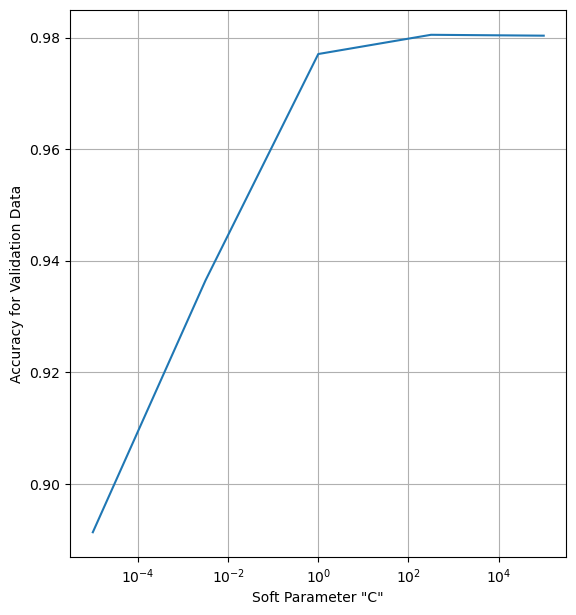

In [11]:
# Nonlinear Soft Margin SVM Classifier
steps_num=5 # number of different soft parameters
steps=np.logspace(-5,5,num=steps_num) # soft parameters
val_score=[] # validation accuracies for different steps

for i in range(steps_num):
  # defines nonlinear SVM classifier with validation using 20% of the training data and without regularization
  nonlinearSVMClassifier=svm.SVC(kernel="rbf", gamma=0.7, C=steps[i],max_iter=2000,tol=0.01)
  nonlinearSVMClassifier.fit(X_train,y_train) # Training
  val_score.append(nonlinearSVMClassifier.score(X_val,y_val)) # stores validation data score for the specified soft parameter

fig, axs = plt.subplots(1,1)
plt.subplots_adjust(top=1.25)

axs.plot(steps,val_score)
axs.set(xlabel='Soft Parameter \"C\"', ylabel='Accuracy for Validation Data')
axs.set_xscale('log')
axs.grid()


best_soft_param=steps[val_score.index(np.max(val_score))] # stores the best soft parameters based on the validation data scores
print(f'Best soft parameter: {best_soft_param}')

nonlinearSVMClassifier=svm.SVC(kernel="rbf", gamma=0.7, C=best_soft_param,max_iter=2000,tol=0.01)
nonlinearSVMClassifier.fit(X_train,y_train) # Training

print(f'\ntest data accuarcy is: {nonlinearSVMClassifier.score(X_test,y_test)*100:.1f}%' )
print(f'train data accuarcy is: {nonlinearSVMClassifier.score(X_train,y_train)*100:.1f}%' )
# finding support vectors
print(f'number of support vectors: {nonlinearSVMClassifier.support_vectors_.shape[0]}')

### Thus, the best coefficient C will be equal to 316.22. Also, using this coefficient, the accuracy for test and training data as well as the number of support vectors will be equal to the following:

test data accuarcy is: 98.0%

train data accuarcy is: 100.0%

number of support vectors: 7607

### Considering the very good accuracy obtained from the non-linear RBF kernel compared to the linear SVM, it can be concluded that the problem dataset is completely non-linearly separable.

***

### Part E.

In this part, we will use Nonlinear Soft Margin SVM Classifier With 5-fold Cross-Validation. 


C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\alire\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\alire\AppData\Roaming\Python\Python39\site-

ValueError: x and y must have same first dimension, but have shapes (5,) and (0,)

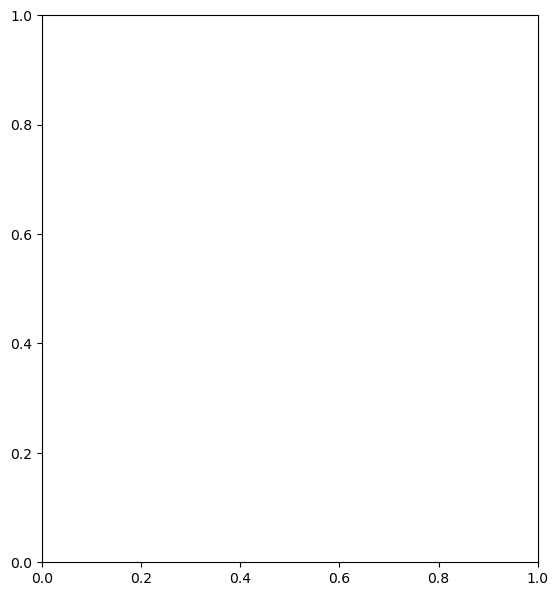

In [12]:
steps_num=5 # number of different soft parameters
steps=np.logspace(-5,5,num=steps_num) # soft parameters
val_score=[] # validation accuracies for different steps
kFoldCVs=[]

for i in range(steps_num):
  # defines nonlinear SVM classifier with validation using 20% of the training data and without regularization
  nonlinearSVMClassifier=svm.SVC(kernel="rbf", gamma=0.7, C=steps[i],max_iter=1000,tol=0.01)
  kFoldScores=cross_val_score(nonlinearSVMClassifier, X, y, cv=5) # divides data into 5 folds
  kFoldCV=np.mean(kFoldScores)
  kFoldCVs.append(kFoldCV) # stores training data score for the specified regularization parameters

fig, axs = plt.subplots(1,1)
plt.subplots_adjust(top=1.25)

axs.plot(steps,val_score)
axs.set(xlabel='Soft Parameter \"C\"', ylabel='Accuracy for Validation Data')
axs.set_xscale('log')

best_soft_param=steps[kFoldCVs.index(np.max(kFoldCVs))] # stores the best soft parameters based on the validation data scores
print(f'Best soft parameter: {best_soft_param}')

nonlinearSVMClassifier=svm.SVC(kernel="rbf", gamma=0.7, C=best_soft_param,max_iter=2000,tol=0.01)
nonlinearSVMClassifier.fit(X_train,y_train) # Training

print(f'\ntest data accuarcy is: {nonlinearSVMClassifier.score(X_test,y_test)*100:.1f}%' )
print(f'train data accuarcy is: {nonlinearSVMClassifier.score(X_train,y_train)*100:.1f}%' )
# finding support vectors
print(f'number of support vectors: {nonlinearSVMClassifier.support_vectors_.shape[0]}')